In [116]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)
    
def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        if 0.1 * i == 0.5:
            continue
        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
    plt.figure(figsize = (15, 15))
    plt.subplot(2, 2, 3)
    plt.title('Ground Truth', fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(2, 2, 4)
    plt.title('Predict Result', fontsize = 18)
    for i in range(x.shape[0]):
        if pred_y[i] <= 0.5:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

def ReLU(x):
    return np.where(x > 0, x, 0)

def derivative_ReLU(x):
    return np.where(x > 0, 1, 0)

def MSE(y, y_hat):
    return np.sum((y - y_hat) ** 2) / y.shape[0]

def y_grad(y, y_hat):
    return 2 * (y - y_hat) / y.shape[0]

class layer:
    def __init__(self,input_size,output_size, activate = "none"):
        self.input_size = input_size
        self.output_size = output_size
        self.activate = activate
        self.gradient = 0
        self.w = np.random.uniform(-1, 1, (input_size, output_size))
        self.b = np.random.uniform(-1, 1, (1, output_size))
        self.a = []
        self.z = []

    def forward(self, x):
        self.x = x
        self.a = np.dot(x,self.w) + self.b
        if(self.activate == "sigmoid"):
            self.z = sigmoid(self.a)
        elif(self.activate == "ReLU"):
            self.z = ReLU(self.a)
        else:
            self.z = self.a
    
    def back(self, gradient, learning_rate): 
        if self.activate == "sigmoid":
            gradient *= derivative_sigmoid(self.z)
        elif self.activate == "ReLU":
            gradient *= derivative_ReLU(self.z)

        self.w -= learning_rate * np.dot(self.x.T, gradient)
        self.b -= learning_rate * np.sum(gradient, axis = 0)
        self.gradient = np.dot(gradient, self.w.T)

class MLP:
    def __init__(self, hidden_size = 5, learning_rate = 0.5, activate = "none"):
        self.learning_rate = learning_rate
        self.hidden1 = layer(2, hidden_size, activate)
        self.hidden2 = layer(hidden_size, hidden_size, activate)
        self.output = layer(hidden_size, 1, activate)
        self.loss = []

    def train(self, x, ground_truth, epoch = 100000):
        plt.figure(figsize = (30, 30))
        plt.subplot(2, 1, 1)
        plt.title('Learning Curves', fontsize = 30)
        plt.xlabel('epoch', fontsize = 30)
        plt.ylabel('loss', fontsize = 30)
        for i in range(epoch):
            self.hidden1.forward(x)
            self.hidden2.forward(self.hidden1.z)
            self.output.forward(self.hidden2.z)

            loss, gradient = self.cost(ground_truth)
            self.loss.append(loss)
            if not i % 5000:
                print("epoch ", i, " loss : ", loss)

            self.output.back(gradient, self.learning_rate)
            self.hidden2.back(self.output.gradient, self.learning_rate)
            self.hidden1.back(self.hidden2.gradient, self.learning_rate)
        plt.plot(self.loss)
        
        show_result(x, ground_truth, self.output.z)
        for i in range(ground_truth.size):
            print("Iter", i + 1," |    Ground truth: ", ground_truth[i], " |   prediction: ", self.output.z[i], " |")
        print("loss=", loss, " accuracy=", 100 * sum((self.output.z > 0.5) == (ground_truth == 1)) / ground_truth.size, "%")
            
    def cost(self, y_hat):
        return MSE(self.output.z, y_hat), y_grad(self.output.z, y_hat)
    
    def test(self, x, ground_truth):
        self.hidden1.forward(x)
        self.hidden2.forward(self.hidden1.z)
        self.output.forward(self.hidden2.z)
        loss = self.cost(ground_truth)
        print("  ===== testing set =====  ")
        show_result(x, ground_truth, self.output.z)
        for i in range(ground_truth.size):
            print("Iter", i + 1," |    Ground truth: ", ground_truth[i], " |   prediction: ", self.output.z[i], " |")
        print("loss=", loss, " accuracy=", 100 * sum((self.output.z > 0.5) == (ground_truth == 1)) / ground_truth.size, "%")
        

epoch  0  loss :  0.2510409406326913
epoch  5000  loss :  0.06342315542442328
epoch  10000  loss :  0.012725948418597761
epoch  15000  loss :  0.007903994133647124
epoch  20000  loss :  0.00616425478810221
epoch  25000  loss :  0.005261771099817285
epoch  30000  loss :  0.004695235960619335
epoch  35000  loss :  0.004292600457553152
epoch  40000  loss :  0.003980020564773108
epoch  45000  loss :  0.0037213931073678875
epoch  50000  loss :  0.003497765078788769
epoch  55000  loss :  0.003298750425810436
epoch  60000  loss :  0.0031183871693238256
epoch  65000  loss :  0.002953027083151595
epoch  70000  loss :  0.0028002657326965884
epoch  75000  loss :  0.0026584010746975644
epoch  80000  loss :  0.002526153024334182
epoch  85000  loss :  0.002402511902750021
epoch  90000  loss :  0.0022866522370477167
epoch  95000  loss :  0.0021778810142012465


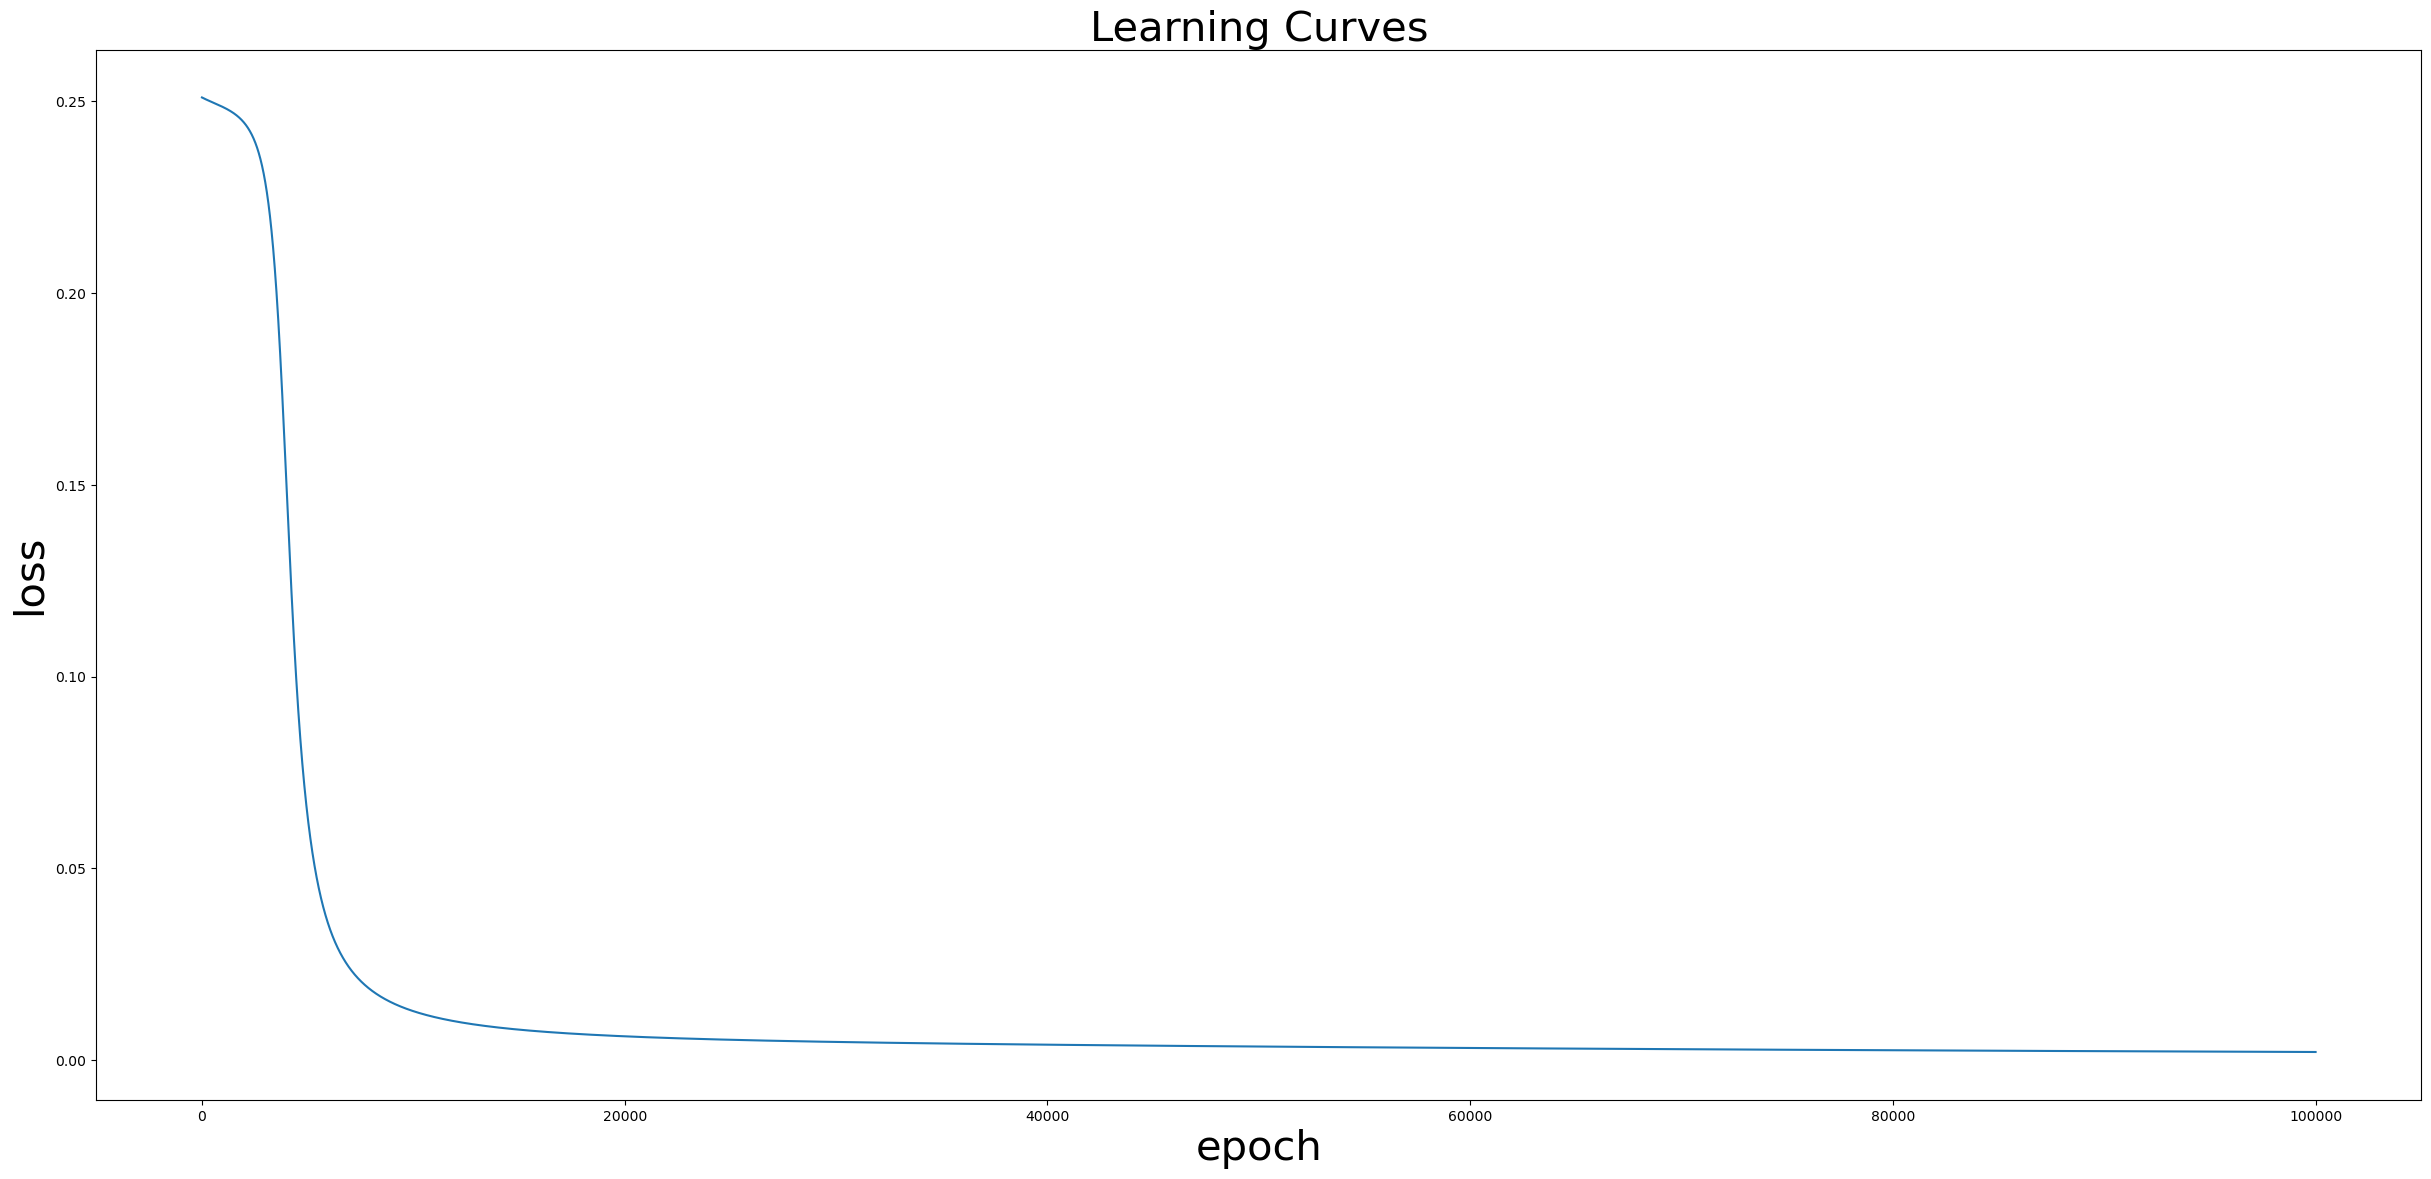

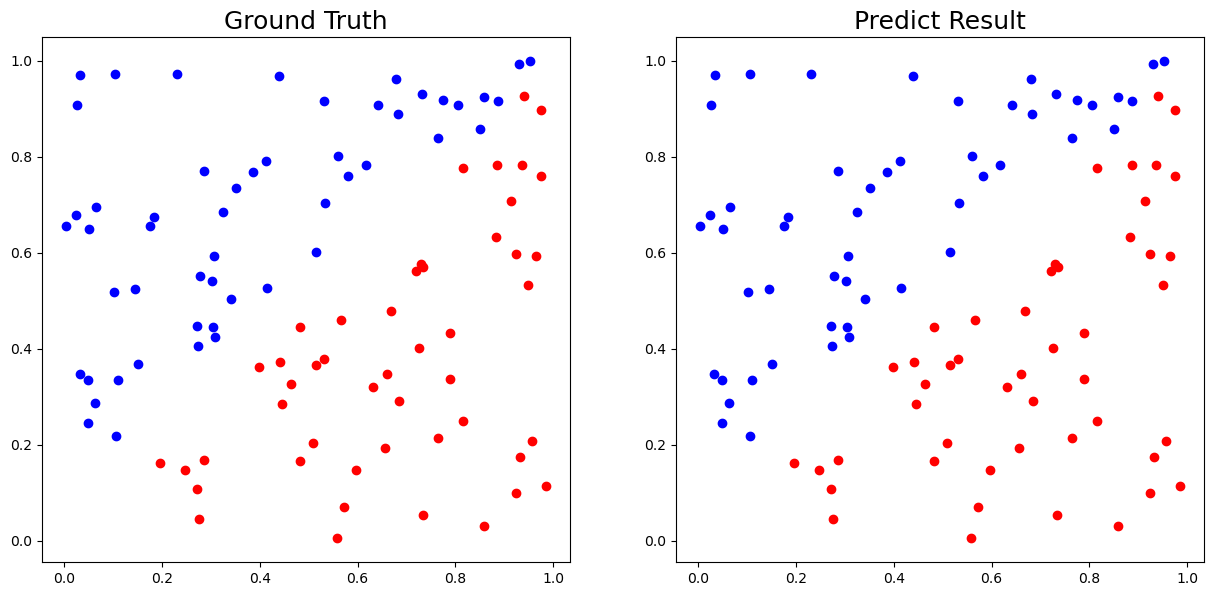

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.00025218]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [0.05459297]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.05561273]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.68998173]  |
Iter 5  |    Ground truth:  [1]  |   prediction:  [0.99994504]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [0.99986682]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [0.99993131]  |
Iter 8  |    Ground truth:  [0]  |   prediction:  [3.31442852e-05]  |
Iter 9  |    Ground truth:  [1]  |   prediction:  [0.99999822]  |
Iter 10  |    Ground truth:  [0]  |   prediction:  [0.00168292]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [3.45523556e-05]  |
Iter 12  |    Ground truth:  [1]  |   prediction:  [0.99999776]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [0.99999191]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [2.25126257e-05]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [0.99999

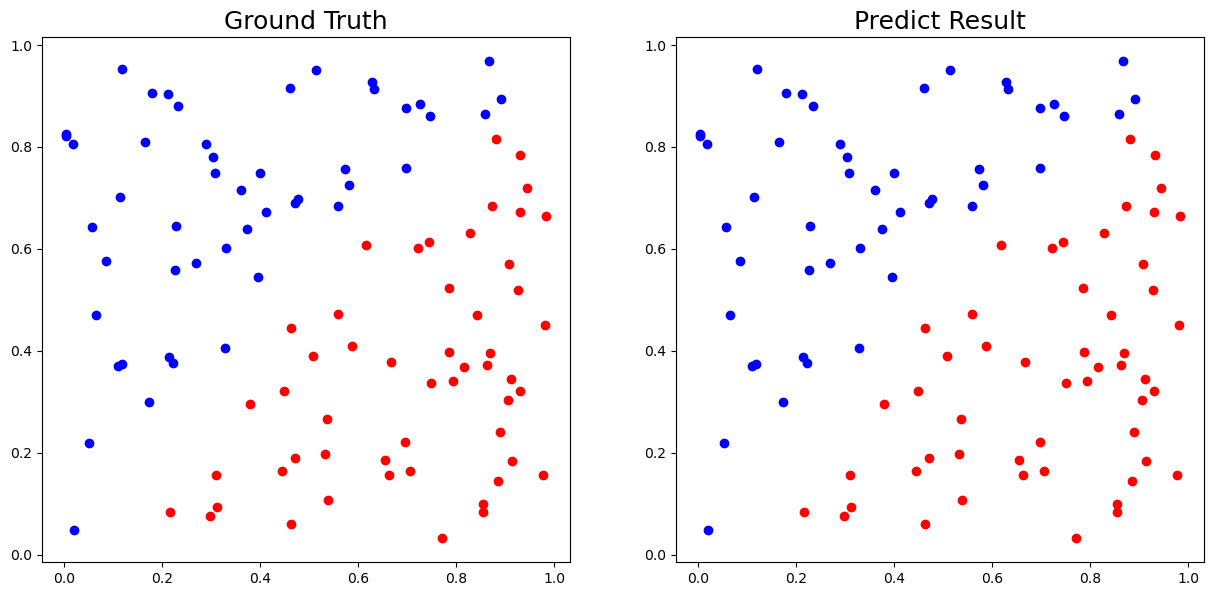

Iter 1  |    Ground truth:  [1]  |   prediction:  [0.99995045]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [2.17763062e-05]  |
Iter 3  |    Ground truth:  [1]  |   prediction:  [0.99984486]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [0.99995343]  |
Iter 5  |    Ground truth:  [1]  |   prediction:  [0.99999134]  |
Iter 6  |    Ground truth:  [0]  |   prediction:  [1.93793607e-05]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [0.9999957]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [0.99999783]  |
Iter 9  |    Ground truth:  [1]  |   prediction:  [0.99997666]  |
Iter 10  |    Ground truth:  [0]  |   prediction:  [0.00080824]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [0.99999179]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [2.43479535e-05]  |
Iter 13  |    Ground truth:  [0]  |   prediction:  [1.70101122e-05]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.00023169]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.00

In [117]:
x1, y1 = generate_linear()
model = MLP(hidden_size = 5,activate = "sigmoid", learning_rate = 0.1)
model.train(x1, y1, epoch = 100000)
testx, testy = generate_linear()
model.test(testx, testy)

epoch  0  loss :  0.3185071594471354
epoch  5000  loss :  0.00014735760664381003
epoch  10000  loss :  4.3231818428404705e-06
epoch  15000  loss :  1.0099248496036206e-07
epoch  20000  loss :  2.2411264207910563e-09
epoch  25000  loss :  4.934692852376143e-11
epoch  30000  loss :  1.0853016385123152e-12
epoch  35000  loss :  2.386525631165138e-14
epoch  40000  loss :  5.247720159691725e-16
epoch  45000  loss :  1.1539141056945923e-17
epoch  50000  loss :  2.537322620620871e-19
epoch  55000  loss :  5.5793970534280544e-21
epoch  60000  loss :  1.2269975502119043e-22
epoch  65000  loss :  2.701198025930613e-24
epoch  70000  loss :  6.045623715139023e-26
epoch  75000  loss :  1.9461323023913968e-27
epoch  80000  loss :  1.9470115125221687e-27
epoch  85000  loss :  1.9470054728058632e-27
epoch  90000  loss :  1.9470115125221687e-27
epoch  95000  loss :  1.9470115125221687e-27


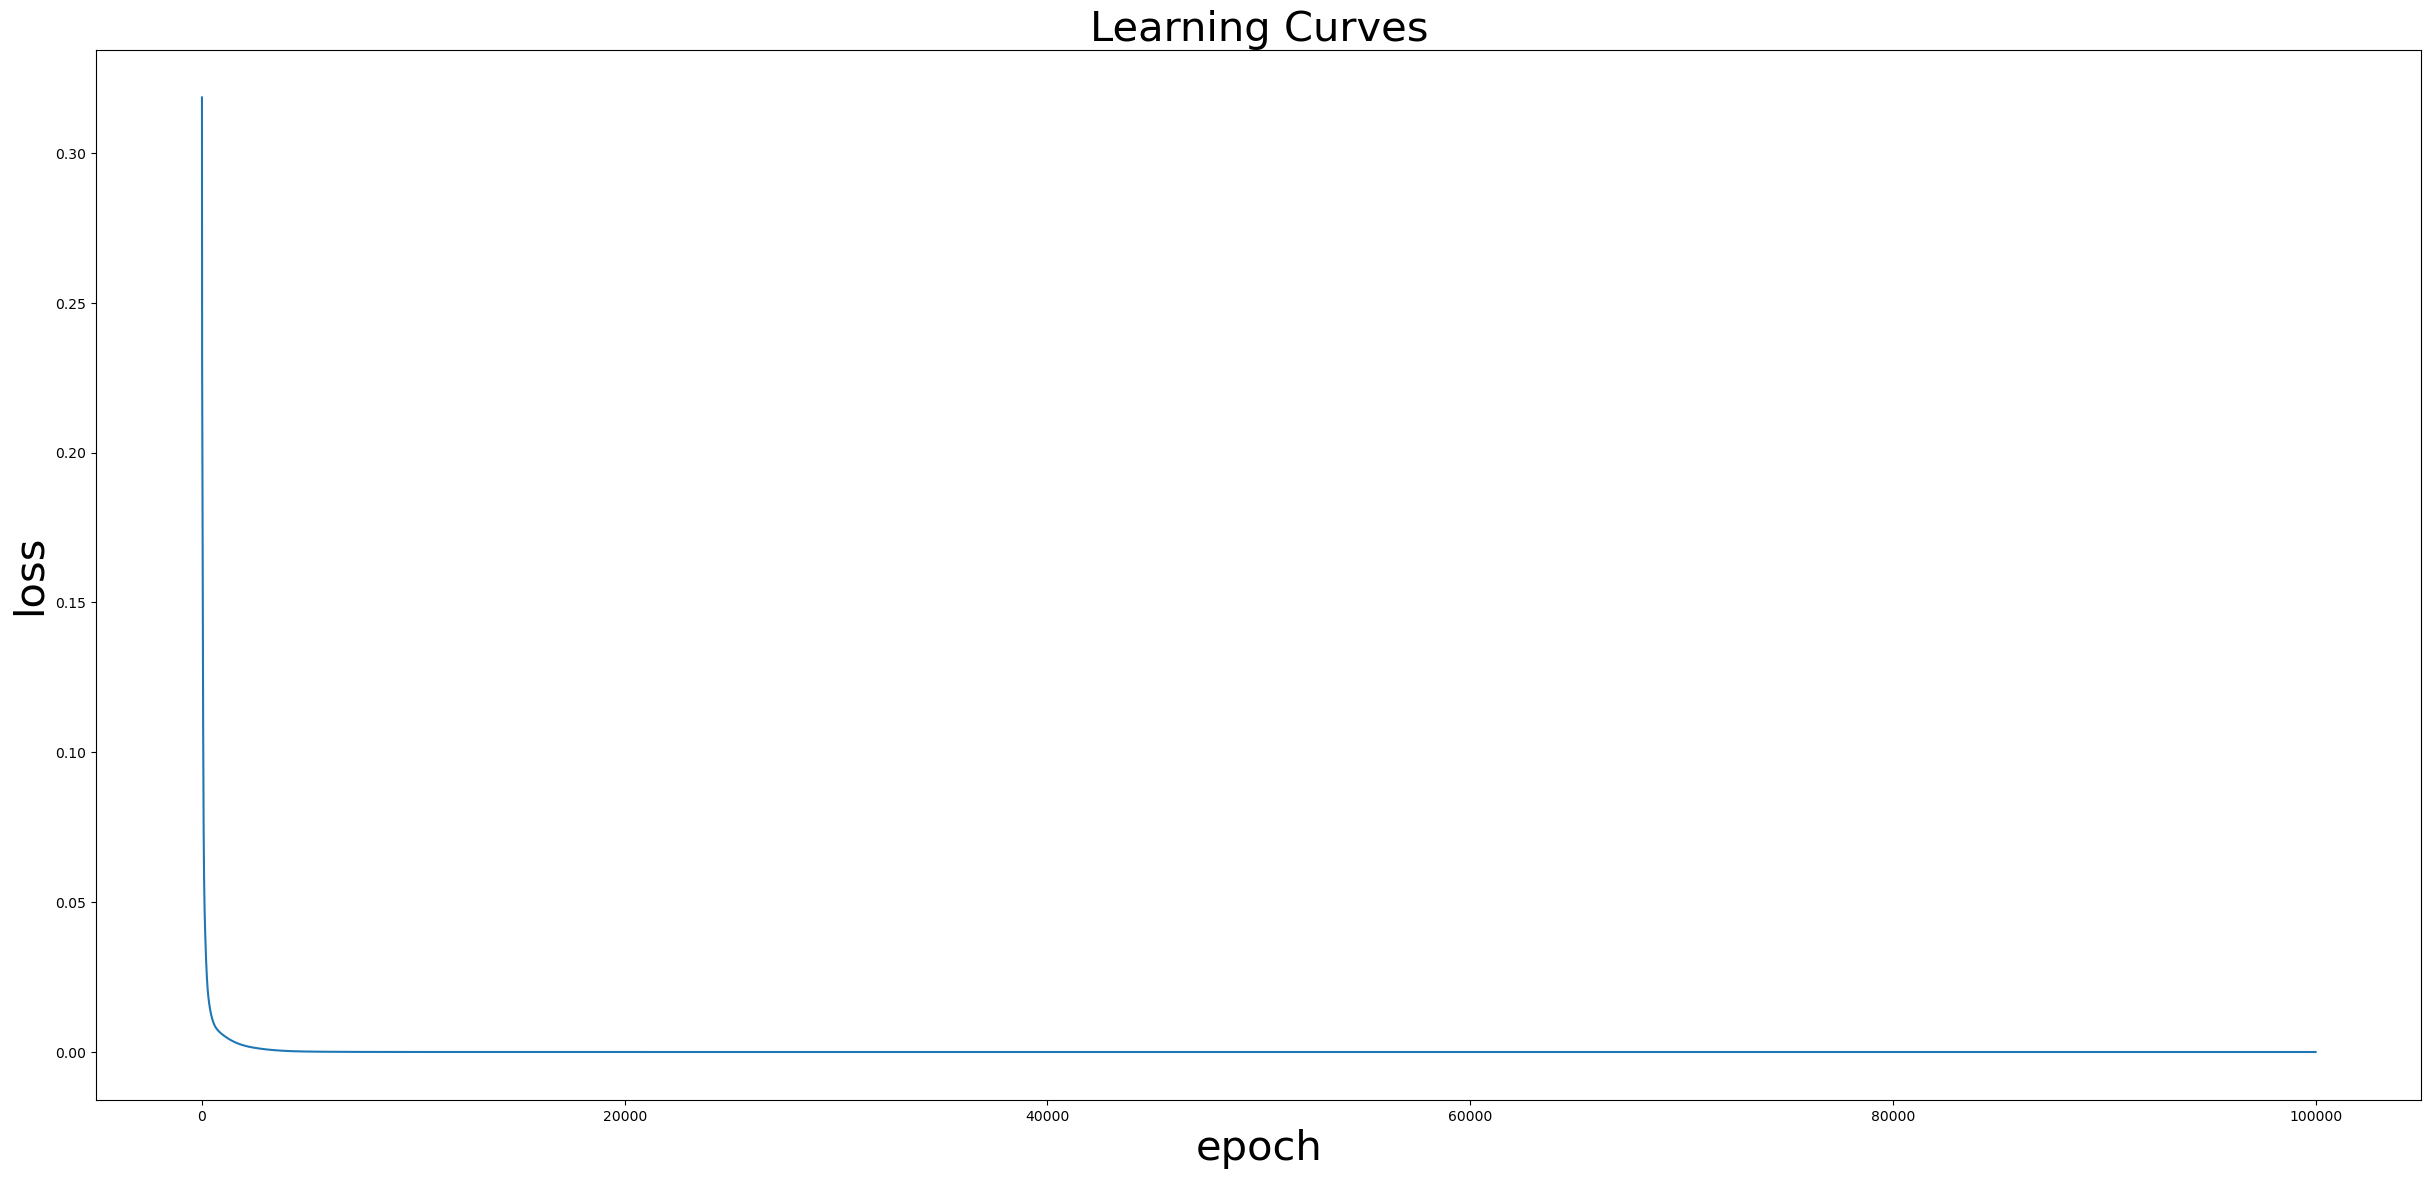

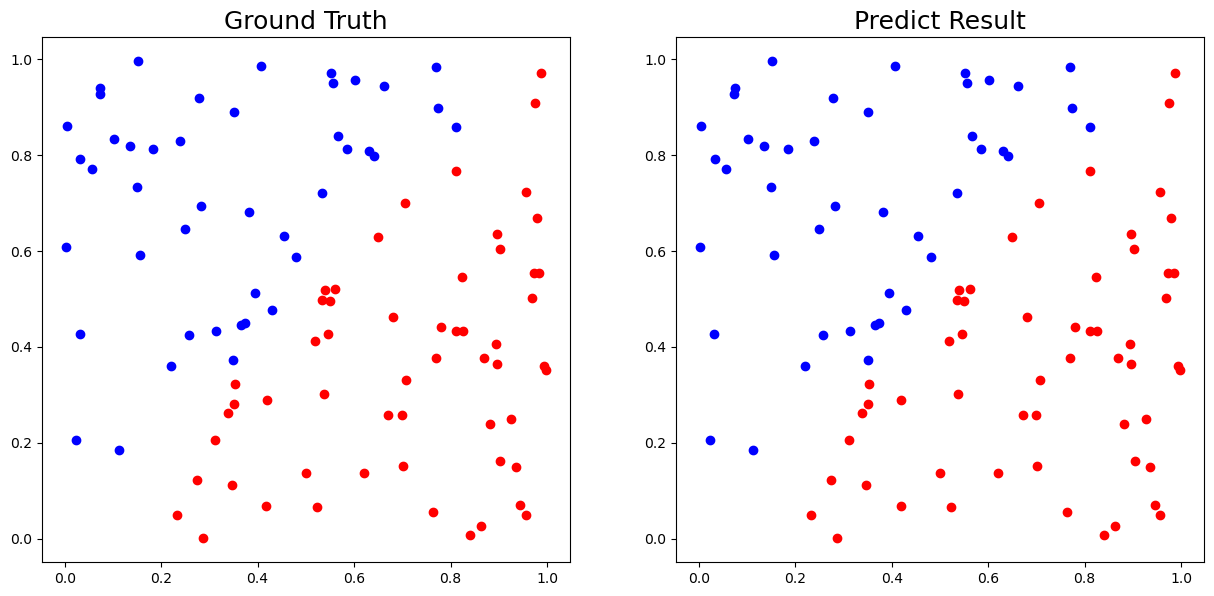

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 3  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 5  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 7  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 8  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 11  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [3.47943896e-13]  |
Iter 15  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 17  |    Ground truth:  [1]  |   prediction:  [1

In [112]:
x2, y2 = generate_linear()
model = MLP(hidden_size = 2,activate = "ReLU", learning_rate = 0.1)
model.train(x2, y2, epoch = 100000)

epoch  0  loss :  2.777253850574109
epoch  5000  loss :  0.04435611895868108
epoch  10000  loss :  0.029009299040473478
epoch  15000  loss :  0.01922600850829182
epoch  20000  loss :  0.01079963190727733
epoch  25000  loss :  0.003328773687635289
epoch  30000  loss :  0.0005179445354492696
epoch  35000  loss :  5.4792939893598795e-05
epoch  40000  loss :  1.8500946222901952e-06
epoch  45000  loss :  2.5713404305531004e-08
epoch  50000  loss :  3.6251884289541887e-10
epoch  55000  loss :  4.995154407491181e-12
epoch  60000  loss :  6.811561241274081e-14
epoch  65000  loss :  9.647461334321907e-16
epoch  70000  loss :  1.3330858350417206e-17
epoch  75000  loss :  1.8527680946696747e-19
epoch  80000  loss :  2.589896886945452e-21
epoch  85000  loss :  3.599776512568734e-23
epoch  90000  loss :  4.986596781586126e-25
epoch  95000  loss :  8.843069117769322e-27


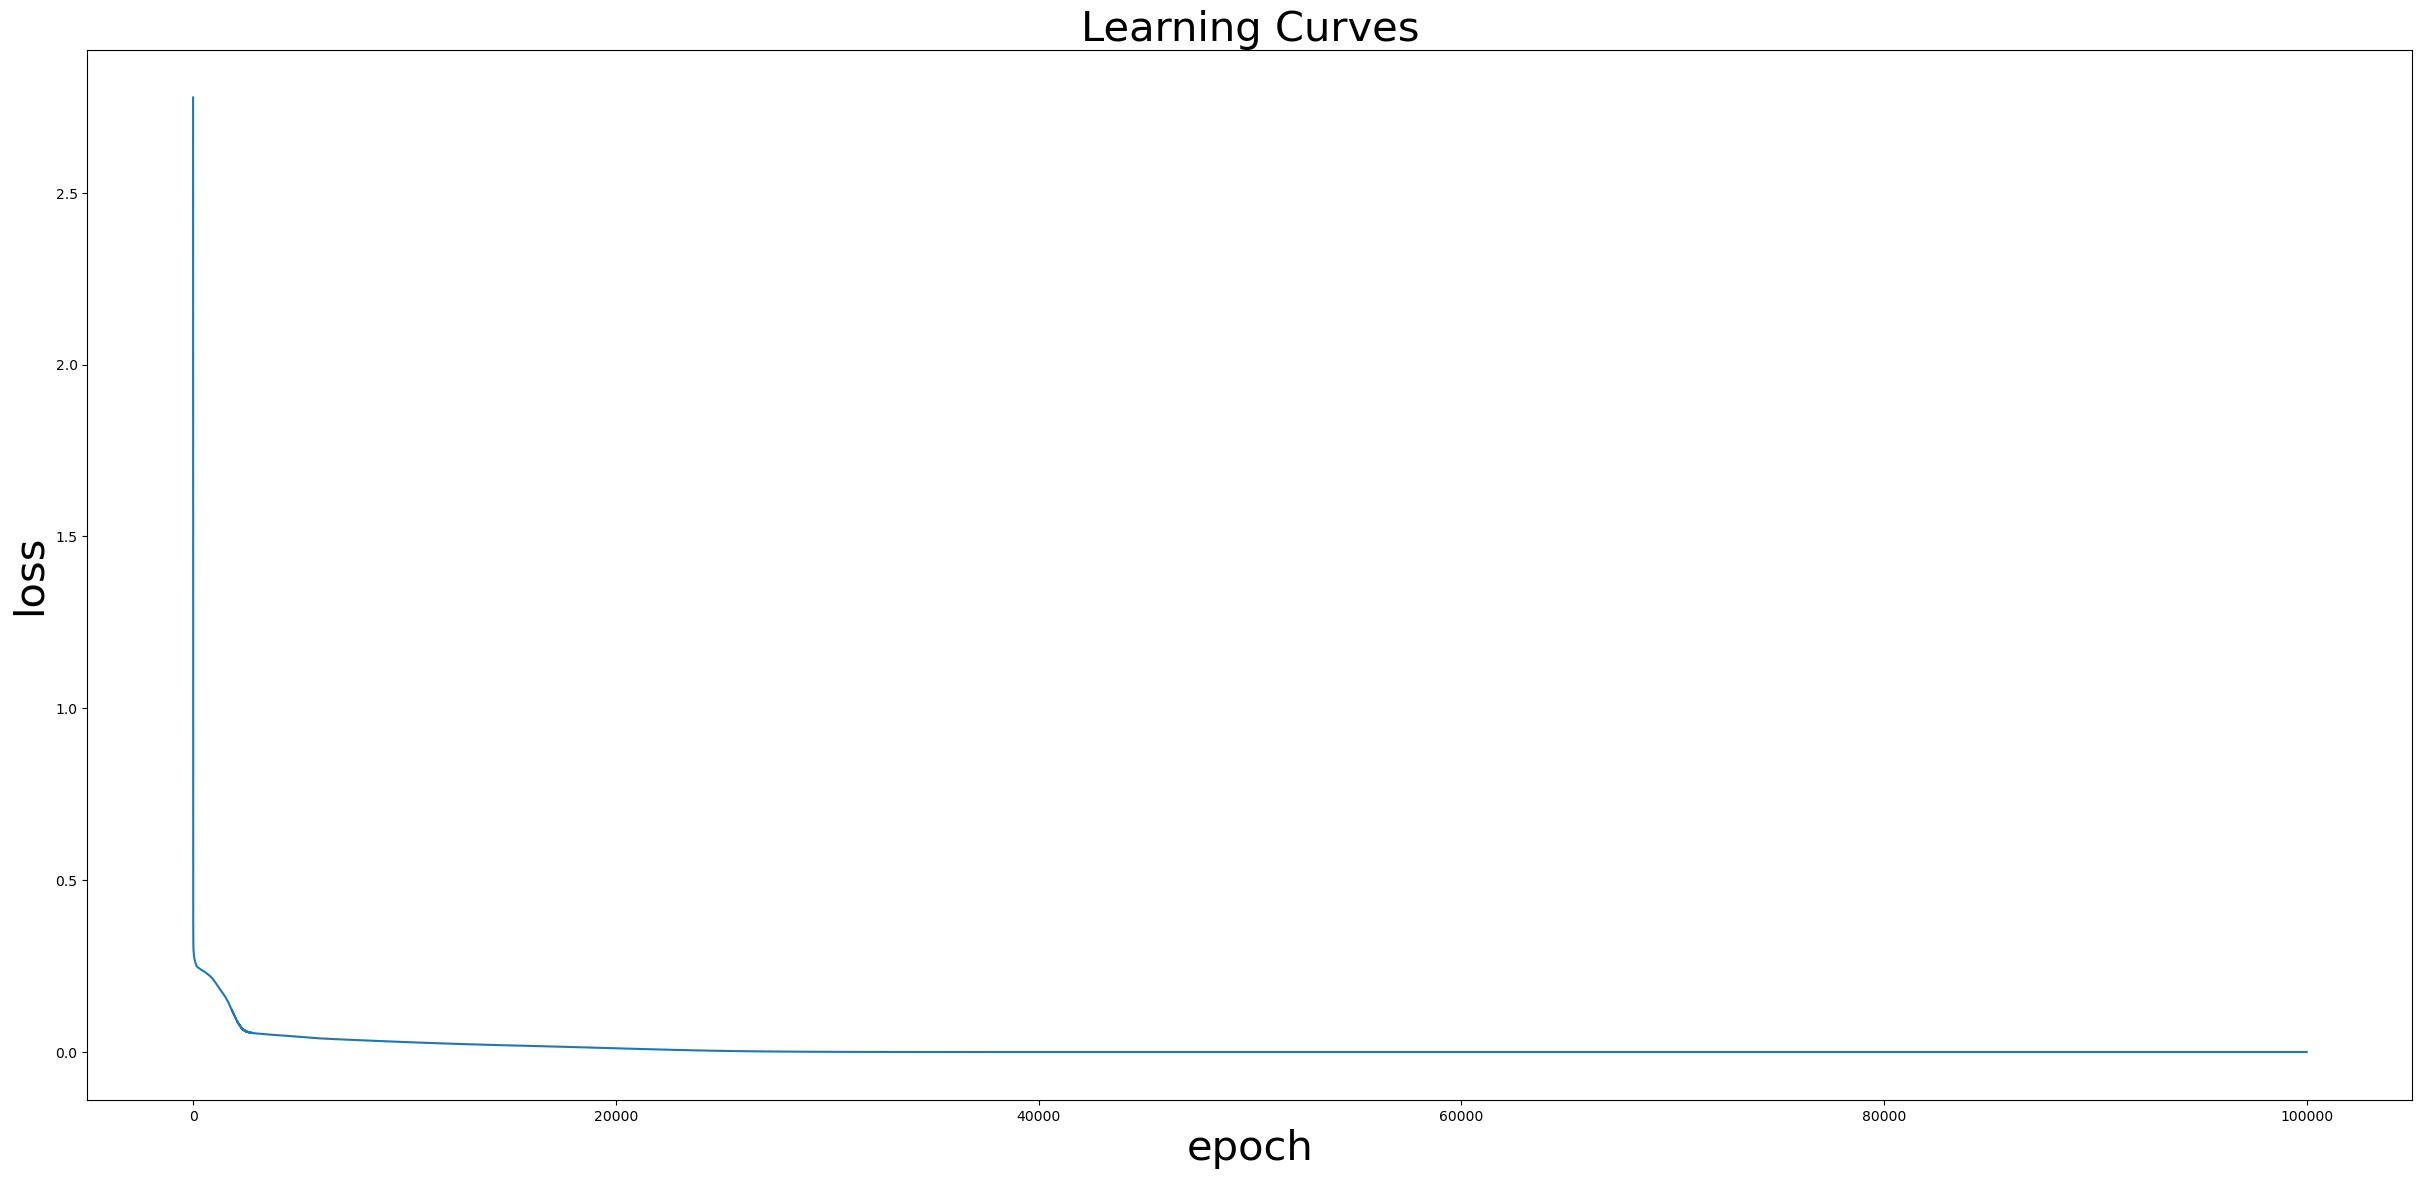

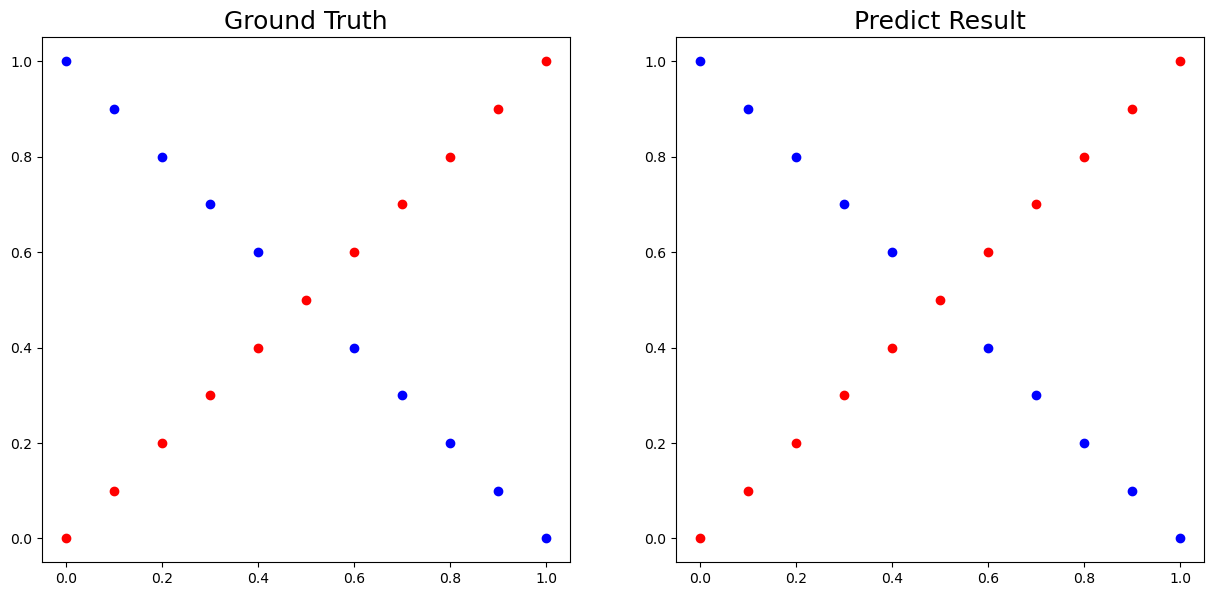

Iter 1  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 2  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 3  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 4  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 5  |    Ground truth:  [0]  |   prediction:  [6.99440506e-15]  |
Iter 6  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 7  |    Ground truth:  [0]  |   prediction:  [2.0539126e-14]  |
Iter 8  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 9  |    Ground truth:  [0]  |   prediction:  [3.51940699e-14]  |
Iter 10  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 11  |    Ground truth:  [0]  |   prediction:  [4.92939023e-14]  |
Iter 12  |    Ground truth:  [0]  |   prediction:  [6.29496455e-14]  |
Iter 13  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 14  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 15  |    Ground truth:  [1]  |   prediction:  [1.]  |
Iter 16  |    Ground truth:  [0]  |   prediction:  [0.]  |
Iter 1

In [82]:
x2, y2 = generate_XOR_easy()
model = MLP(hidden_size = 5,activate = "ReLU", learning_rate = 0.01)
model.train(x2, y2, epoch = 100000)